# KNEE X RAY CLASSIFICATION

This project focuses on developing a machine learning-based classification model to identify and classify knee conditions associated with osteoporosis. By leveraging advanced data science techniques, the goal is to automate the diagnosis process, making it more efficient and accurate compared to traditional manual assessments.

In [1]:
import sys
print(sys.executable)

/Users/atharvadumbre/Osteoporosis_knee_Classification-main/.venv/bin/python


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from PIL import Image,ImageEnhance
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

In [13]:
import kagglehub

path = kagglehub.dataset_download("sachinkumar413/osteoporosis-knee-dataset-preprocessed128x256")

print("Path to dataset files:", path)

Path to dataset files: /Users/atharvadumbre/.cache/kagglehub/datasets/sachinkumar413/osteoporosis-knee-dataset-preprocessed128x256/versions/1


In [34]:
os.listdir(path)

['Osteoporosis Knee Dataset']

In [39]:
data_dir = r'/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Osteoporosis Knee Dataset'

In [40]:
os.listdir(data_dir)

['.DS_Store', 'Osteoporosis', 'Normal']

# Visualizing  osteoporosis images 

In [42]:
import os

# Define data_dir
data_dir = r'/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Osteoporosis Knee Dataset'

# Construct the correct path to the 'Osteoporosis' folder
Osteoporosis_folder = os.path.join(data_dir, 'Osteoporosis')

# Check if the directory exists
if os.path.exists(Osteoporosis_folder):
    print("Directory exists:", Osteoporosis_folder)
    Osteoporosis_path = os.listdir(Osteoporosis_folder)[0]
    print("First file in the directory:", Osteoporosis_path)
else:
    print(f"The directory {Osteoporosis_folder} does not exist.")

Directory exists: /Users/atharvadumbre/Osteoporosis_knee_Classification-main/Osteoporosis Knee Dataset/Osteoporosis
First file in the directory: Osteoporosis_120.jpg


In [44]:
import os

data_dir = r'/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Osteoporosis Knee Dataset'

# Correct way to concatenate paths
Osteoporosis_folder = os.path.join(data_dir, 'Osteoporosis')

# Now you can list files in the folder
Osteoporosis_path = os.listdir(Osteoporosis_folder)[0]

print(f"First file in the directory: {Osteoporosis_path}")

First file in the directory: Osteoporosis_120.jpg


In [46]:
os_images = os.path.join(data_dir, 'Osteoporosis', Osteoporosis_path)

In [47]:
imread(os_images).shape

(256, 128, 3)

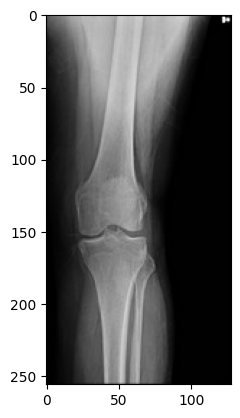

In [48]:
plt.imshow(imread(os_images))

In [143]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Ensure data_dir is defined correctly
data_dir = '/Users/atharvadumbre/.cache/kagglehub/datasets/sachinkumar413/osteoporosis-knee-dataset-preprocessed128x256/versions/1/'

# List contents of 'Osteoporosis Knee Dataset' directory
Osteoporosis_files = os.listdir(os.path.join(data_dir, 'Osteoporosis Knee Dataset'))

# Define the first file or subdirectory in the 'Osteoporosis' folder
Osteoporosis_path = Osteoporosis_files[0]

# Concatenate the full path to the file
os_images = os.path.join(data_dir, 'Osteoporosis Knee Dataset', Osteoporosis_path)

# Check if the path is a directory or file
if os.path.isdir(os_images):
    print(f"{os_images} is a directory.")
elif os.path.isfile(os_images):
    print(f"{os_images} is a file.")
    # Read and display the image using imread and plt.imshow
    image = imread(os_images)
    plt.imshow(image)
    plt.axis('off')  # Optional: Hide axes
    plt.show()
else:
    print(f"Invalid path: {os_images}")
    

/Users/atharvadumbre/.cache/kagglehub/datasets/sachinkumar413/osteoporosis-knee-dataset-preprocessed128x256/versions/1/Osteoporosis Knee Dataset/Osteoporosis is a directory.


## More Visualisation on Osteoporosis images

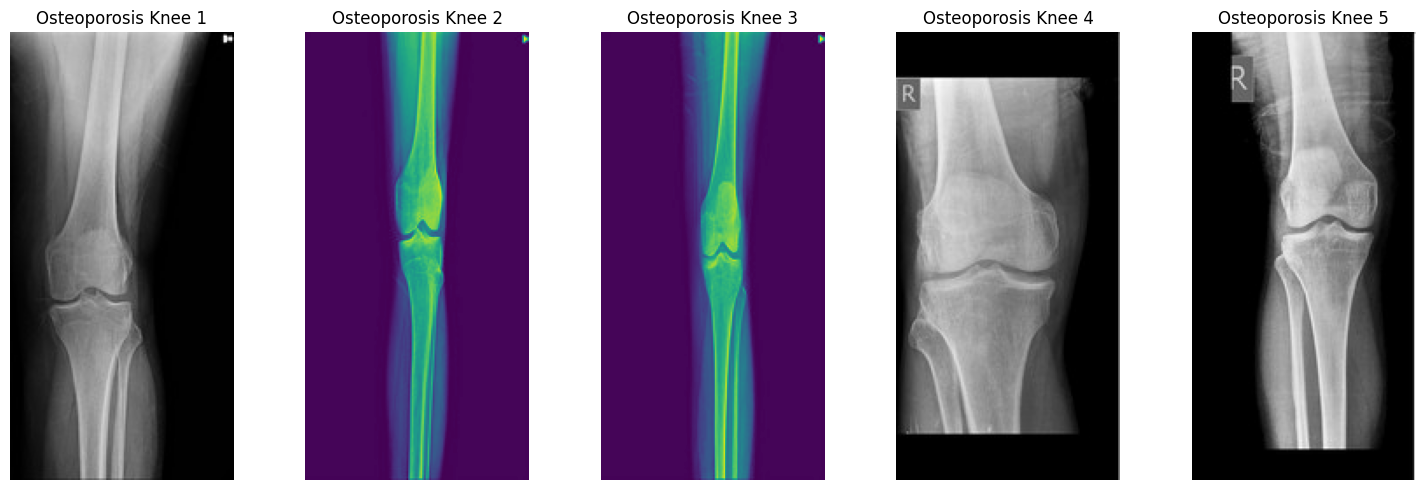

In [50]:

data_dir = '/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Osteoporosis Knee Dataset'

# Assuming your images are inside 'Osteoporosis' subfolder
Osteoporosis_dir = os.path.join(data_dir, 'Osteoporosis')

# Get the list of image files (limit to first 5 for visualization)
image_files = os.listdir(Osteoporosis_dir)[:5]

# Create a subplot for 5 images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Iterate over the image files and display each one
for i, img_file in enumerate(image_files):
    img_path = os.path.join(Osteoporosis_dir, img_file)  # Get full image path
    img = imread(img_path)  # Read the image using imread
    axes[i].imshow(img)  # Display the image
    axes[i].axis('off')  # Hide axes for cleaner display
    axes[i].set_title(f"Osteoporosis Knee {i+1}")  # Set title for each image

# Adjust layout and show the images
plt.tight_layout()
plt.show()

# Visualizing Healthy images 

In [53]:
n_path = os.listdir(os.path.join(data_dir, 'Normal'))[0]

In [54]:
n_images =data_dir+'Normal/'+n_path

In [57]:
# Correct path construction using os.path.join
n_images = os.path.join(data_dir, 'Normal', normal_path)

# Try to read the image
img = imread(n_images)
print(img.shape)  # Print the shape of the image to confirm it is read correctly

(256, 128, 3)


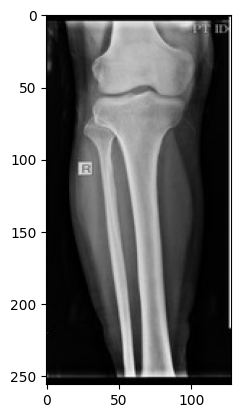

In [58]:
plt.imshow(imread(n_images))

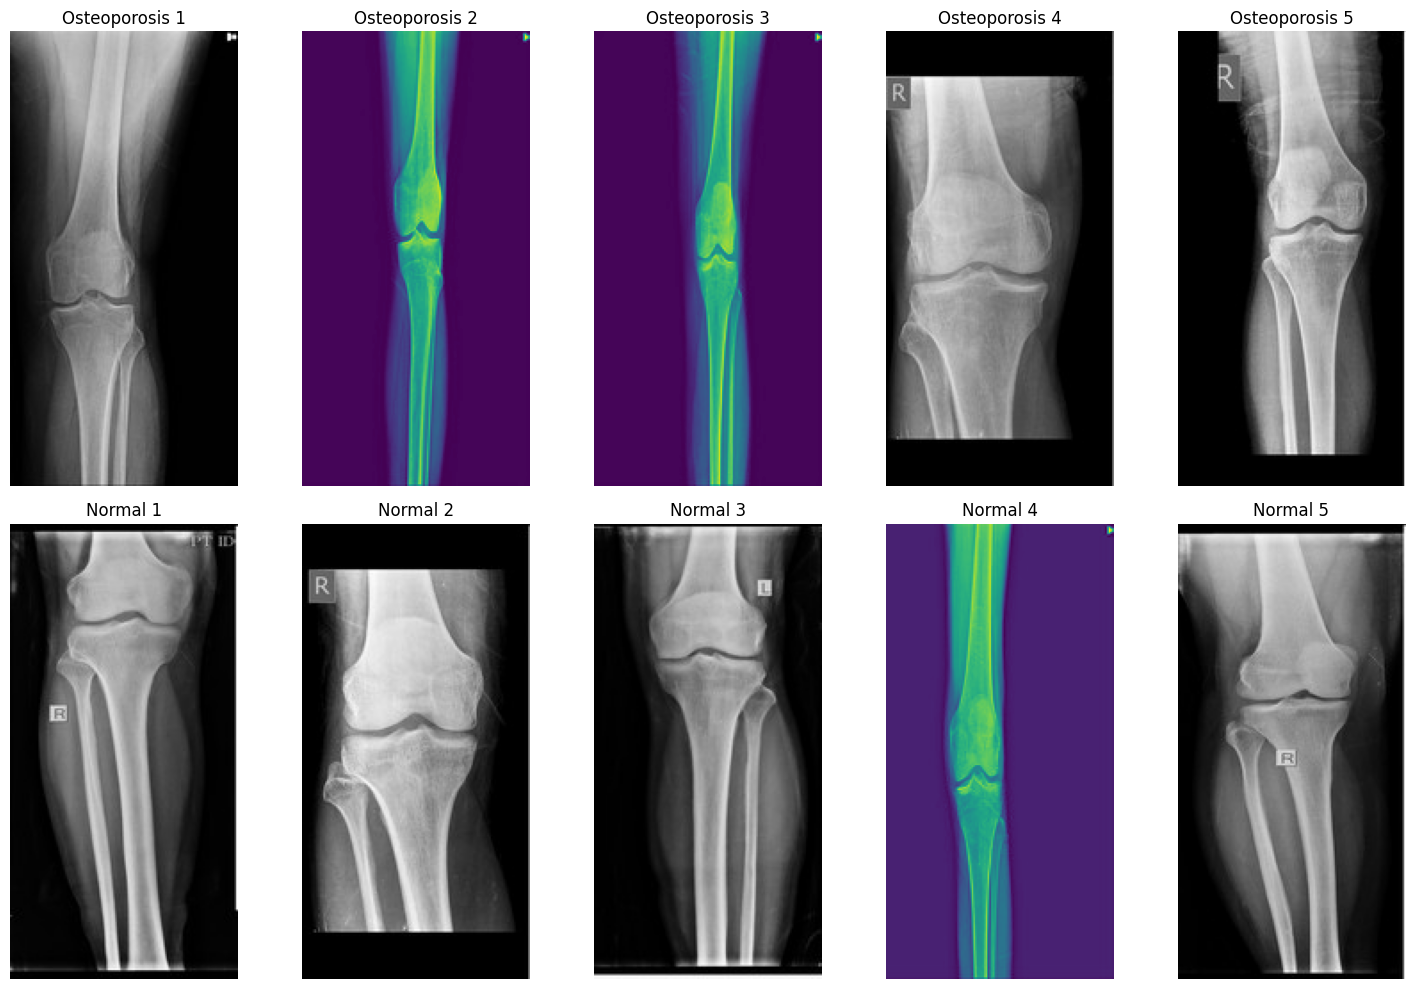

In [59]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Path to the dataset
data_dir = '/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Osteoporosis Knee Dataset'

# Paths to Osteoporosis and Normal directories
Osteoporosis_dir = os.path.join(data_dir, 'Osteoporosis')
Normal_dir = os.path.join(data_dir, 'Normal')

# Get the list of images from both directories
Osteoporosis_images = os.listdir(Osteoporosis_dir)[:5]
Normal_images = os.listdir(Normal_dir)[:5]

# Create subplots for Osteoporosis and Normal images (5 from each)
fig, axes = plt.subplots(2, 5, figsize=(15, 10))

# Display Osteoporosis images
for i, img_file in enumerate(Osteoporosis_images):
    img_path = os.path.join(Osteoporosis_dir, img_file)
    img = imread(img_path)
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Osteoporosis {i+1}")

# Display Normal images
for i, img_file in enumerate(Normal_images):
    img_path = os.path.join(Normal_dir, img_file)
    img = imread(img_path)
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title(f"Normal {i+1}")

# Adjust layout and show the images
plt.tight_layout()
plt.show()

In [60]:
# Get the full path of the first image from the Normal directory
n_path = os.path.join(Normal_dir, os.listdir(Normal_dir)[0])

# Read the image using imread
n_image = imread(n_path)

# Print the shape of the image
print(n_image.shape)

(256, 128, 3)


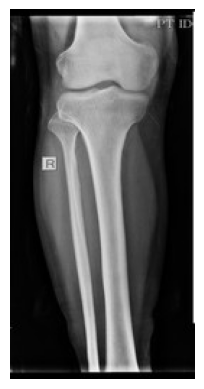

In [61]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Construct the full path to the first Normal image
n_images = os.path.join(Normal_dir, n_path)

# Read the image using imread
n_image = imread(n_images)

# Display the image using imshow
plt.imshow(n_image)
plt.axis('off')  # Hide the axes
plt.show()

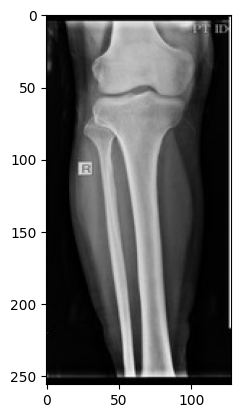

In [62]:
plt.imshow(imread(n_images))

## More Visualisation on healthy images

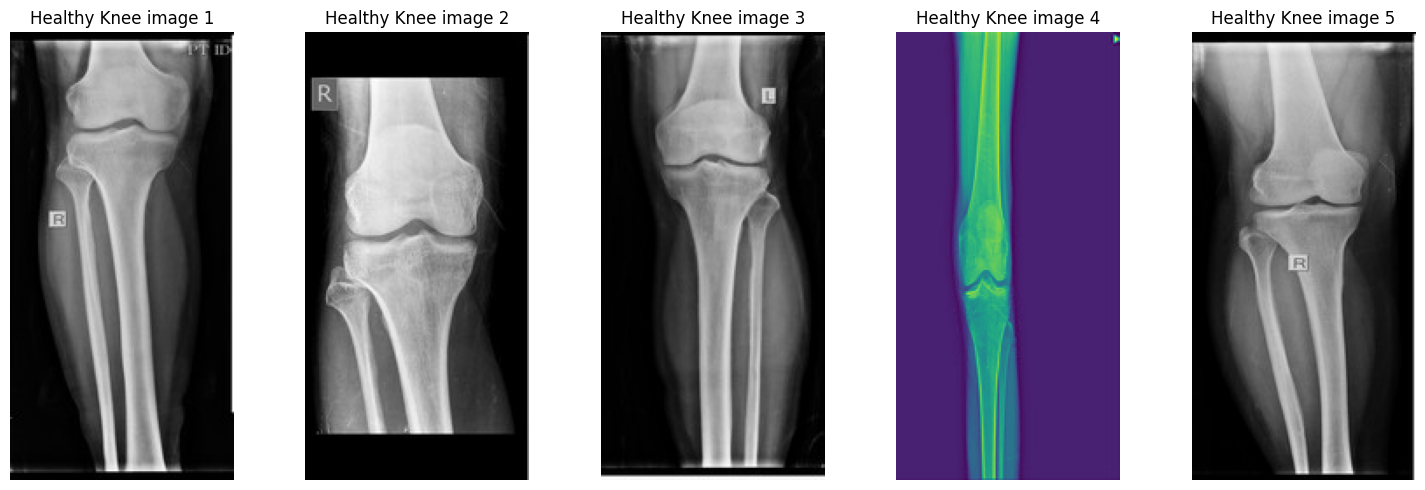

In [63]:

normal_dir = os.path.join(data_dir, 'Normal')
image_files = os.listdir(normal_dir)[:5]
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  
for i, img_file in enumerate(image_files):
    img_path = os.path.join(normal_dir, img_file)
    img = imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off') 
    axes[i].set_title(f"Healthy Knee image {i+1}") 
plt.tight_layout()
plt.show()

In [64]:
# Define the directory paths for each image class folder
healthy_dirs = r'/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Osteoporosis Knee Dataset/Normal'
osteoporosis_dirs = r'/Users/atharvadumbre/Osteoporosis_knee_Classification-main/Osteoporosis Knee Dataset/Osteoporosis'

In [65]:
##  Looping through each folder with various file extensions and converting path of each image to a row 

healthy_dirs =healthy_dirs
osteoporosis_dirs=osteoporosis_dirs


filepaths = []
labels = []

dict_lists = [healthy_dirs, osteoporosis_dirs]
class_labels = ['Healthy', 'Osteoporosis']
image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

for i, dir_list in enumerate(dict_lists):
    flist = os.listdir(dir_list)  
    for f in flist:
    
        if f.lower().endswith(image_extensions):  
            fpath = os.path.join(dir_list, f)  
            filepaths.append(fpath)  
            labels.append(class_labels[i]) 


In [66]:

# Creating  a DataFrame from the file paths and labels
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
knee_osteoporosis_data = pd.concat([Fseries, Lseries], axis=1)
knee_osteoporosis_df = pd.DataFrame(knee_osteoporosis_data)


In [67]:
knee_osteoporosis_df


,filepaths,labels
0,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Healthy
1,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Healthy
2,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Healthy
3,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Healthy
4,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Healthy
...,...,...
367,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Osteoporosis
368,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Osteoporosis
369,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Osteoporosis
370,/Users/atharvadumbre/Osteoporosis_knee_Classif...,Osteoporosis


In [68]:
knee_osteoporosis_df.shape

(372, 2)

In [69]:
knee_osteoporosis_df['labels'].value_counts()

labels
Healthy         186
Osteoporosis    186
Name: count, dtype: int64

### My dataset lacks enough images to effectively train my model. To address this, I need to generate additional images using offline augmentation techniques

In [111]:

# Defining output folders for augmented images
output_dir = "./augmented_data"
classes = ["Healthy", "Osteoporosis"]
for class_name in classes:
    class_path = os.path.join(output_dir, class_name)
    os.makedirs(class_path, exist_ok=True)


In [113]:
def augment_and_save(image_path, save_dir, base_name):
    """Apply augmentations and save images."""
    image = Image.open(image_path)
    
    # Rotation
    for angle in [90, 180, 270]:
        rotated = image.rotate(angle)
        rotated.save(os.path.join(save_dir, f"{base_name}_rot{angle}.jpg"))
    
    # Flipping
    flipped = image.transpose(Image.FLIP_LEFT_RIGHT)
    flipped.save(os.path.join(save_dir, f"{base_name}_flip.jpg"))
    
    # Brightness adjustments
    enhancer = ImageEnhance.Brightness(image)
    for factor in [0.5, 1.5]:  # Darker and brighter versions
        brightened = enhancer.enhance(factor)
        brightened.save(os.path.join(save_dir, f"{base_name}_bright{factor}.jpg"))
# Shear transformations
    #for shear in [0.2, 0.4]:
        #sheared = image.transform((width, height), Image.AFFINE, (1, shear, 0, shear, 1, 0))
        #sheared.save(os.path.join(save_dir, f"{base_name}_shear{shear}.jpg"))
    
    # Adding noise
    noise_factor = 0.05
    np_img = np.array(image)
    noise = np.random.normal(0, noise_factor, np_img.shape)
    noisy_img = np_img + noise * 255  # Scale by 255 for RGB
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    noisy_image = Image.fromarray(noisy_img)
    noisy_image.save(os.path.join(save_dir, f"{base_name}_noise.jpg"))
    
    # Random Color Jitter (Random adjustments to the image's contrast, brightness, and saturation)
    enhancer_contrast = ImageEnhance.Contrast(image)
    enhancer_saturation = ImageEnhance.Color(image)
    for contrast_factor in [0.8, 1.2]:
        for saturation_factor in [0.8, 1.2]:
            contrast_enhanced = enhancer_contrast.enhance(contrast_factor)
            final_image = enhancer_saturation.enhance(saturation_factor)
            final_image.save(os.path.join(save_dir, f"{base_name}_contrast{contrast_factor}_saturation{saturation_factor}.jpg"))
# Loop through the DataFrame and apply augmentations
for index, row in knee_osteoporosis_df.iterrows():
    img_path = row["filepaths"]
    label = row["labels"]
    
    save_dir = os.path.join(output_dir, label)
    base_name = os.path.splitext(os.path.basename(img_path))[0]
    augment_and_save(img_path, save_dir, base_name)

In [114]:
# Rebuild DataFrame for augmented data
augmented_filepaths = []
augmented_labels = []

# Loop through augmented folders
for label in classes:
    class_folder = os.path.join(output_dir, label)
    files = os.listdir(class_folder)
    
    for file in files:
        augmented_filepaths.append(os.path.join(class_folder, file))
        augmented_labels.append(label)

# Create a DataFrame
augmented_df = pd.DataFrame({
    "filepaths": augmented_filepaths,
    "labels": augmented_labels
})


In [115]:
augmented_df

,filepaths,labels
0,./augmented_data/Healthy/Normal_147_rot90.jpg,Healthy
1,./augmented_data/Healthy/Normal_144_contrast0....,Healthy
2,./augmented_data/Healthy/Normal_143_bright0.5.jpg,Healthy
3,./augmented_data/Healthy/Normal_45_bright1.5.jpg,Healthy
4,./augmented_data/Healthy/Normal_95_contrast0.8...,Healthy
...,...,...
4087,./augmented_data/Osteoporosis/Osteoporosis_80_...,Osteoporosis
4088,./augmented_data/Osteoporosis/Osteoporosis_123...,Osteoporosis
4089,./augmented_data/Osteoporosis/Osteoporosis_71_...,Osteoporosis
4090,./augmented_data/Osteoporosis/Osteoporosis_175...,Osteoporosis


In [116]:
augmented_df.shape

(4092, 2)

In [117]:
augmented_df['labels'].value_counts()

labels
Healthy         2046
Osteoporosis    2046
Name: count, dtype: int64

In [118]:

# Split the DataFrame into train and test sets and stratify the label to preserve my class distribution because  im going to perform flow from dataframe 

train_df, test_df = train_test_split(augmented_df,  test_size=0.2, stratify=augmented_df['labels'], random_state=42)

In [119]:
# Creating ImageDataGenerators to normalize and rescale my images

train_datagen = ImageDataGenerator(rescale=1./255)  
test_datagen = ImageDataGenerator(rescale=1./255) 

In [120]:
# Define the target size and batch size

TARGET_SIZE = (150, 150)  
BATCH_SIZE = 32


### Creating my Train and test generators

In [121]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',  
    y_col='labels',     
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  
    shuffle=True         
)

Found 3273 validated image filenames belonging to 2 classes.


In [122]:

# creating my test generator. it is not good to shuffle the test data 

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False 
)


Found 819 validated image filenames belonging to 2 classes.


In [123]:
# Define a simple CNN model

model = Sequential([Conv2D(filters= 32, kernel_size= (3, 3), activation='relu', input_shape=(150, 150, 3)),
           MaxPooling2D(pool_size=(2, 2)),
          Flatten(),
          Dense(128, activation='relu'), #128: Number of neurons in this layer.
          Dense(1, activation='sigmoid') #1: Single neuron output (since this is a binary classification task).
])

In [124]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [125]:
# Train the model

history = model.fit(train_generator,validation_data=test_generator,epochs=10)

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - accuracy: 0.5867 - loss: 5.9722 - val_accuracy: 0.6447 - val_loss: 1.9854
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.6453 - loss: 1.7717 - val_accuracy: 0.6679 - val_loss: 1.7374
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.6844 - loss: 0.9384 - val_accuracy: 0.7302 - val_loss: 0.5969
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.7240 - loss: 0.6488 - val_accuracy: 0.7131 - val_loss: 0.5650
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.7014 - loss: 0.6519 - val_accuracy: 0.7448 - val_loss: 0.5101
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.7737 - loss: 0.4550 - val_accuracy: 0.8010 - val_loss: 0.4156
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.8338 - loss: 0.3638 - val_accuracy: 0.7949 - val_loss: 0.4477
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.8522 - loss: 0

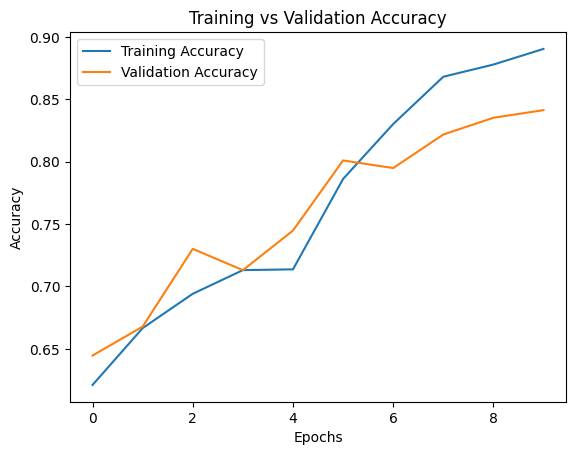

In [126]:

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### please  note that this model can be improved to get a better accuracy. The model is  straightforward. For better performance increase the following 


### Increase the Number of Layers,
### increase Filter Sizes,
### Use Dropout Layers,
###  Adjust Kernel Size,
adjust learning rate

In [100]:
test_generator.class_indices

{'Healthy': 0, 'Osteoporosis': 1}

In [127]:

# Get predictions for the test data
predictions = model.predict(test_generator)

predictions_binary = (predictions > 0.5)

true_labels = test_generator.classes

# Print the classification report
print(classification_report(true_labels, predictions_binary))


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       410
           1       0.85      0.83      0.84       409

    accuracy                           0.84       819
   macro avg       0.84      0.84      0.84       819
weighted avg       0.84      0.84      0.84       819



## Saving and loading the model

In [128]:
# Save the model
model.save('cnn_model.h5')


In [129]:
model.save('cnn_model.keras')


In [178]:
# Clear optimizer state
model.optimizer = None

# Save the model
model.save('cnn_model.keras')

In [130]:
# Load the model
cnn_model = load_model('cnn_model.keras')

## Testing the loaded cnn model with a healthy knee image path

In [131]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the image
image_path = '/Users/atharvadumbre/Osteoporosis_knee_Classification-main/augmented_data/Healthy/Normal_2_bright0.5.jpg'
img = load_img(image_path, target_size=(150, 150))  # Resize to (128, 256)
img_array = img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)






In [132]:
img_array.shape

(1, 150, 150, 3)

In [133]:
from tensorflow.keras.models import load_model

# Load the existing model (adjust the path as needed)
cnn_model = load_model('cnn_model.keras', compile=False)  # Disable optimizer compilation if necessary

In [134]:
predictions = cnn_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


In [135]:
predictions

array([[0.07246621]], dtype=float32)

In [136]:
test_generator.class_indices

{'Healthy': 0, 'Osteoporosis': 1}